In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Load your dataset (update path if needed)
df = pd.read_csv("C:/Users/DELL/Desktop/Titanic-Dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Drop unnecessary columns
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

# Fill missing Age with median
df["Age"].fillna(df["Age"].median(), inplace=True)

# Fill missing Embarked with mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Encode 'Sex' and 'Embarked'
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
df["Sex"] = le_sex.fit_transform(df["Sex"])
df["Embarked"] = le_embarked.fit_transform(df["Embarked"])

df.head()


C:\Users\DELL\AppData\Local\Temp\ipykernel_9060\1549102776.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_9060\1549102776.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [6]:
# Features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Logistic Regression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



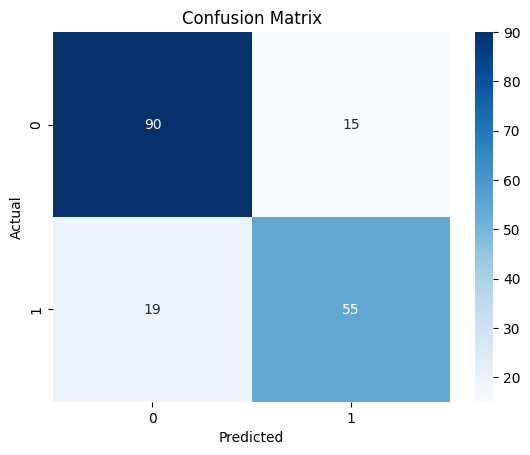

In [8]:
# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [9]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

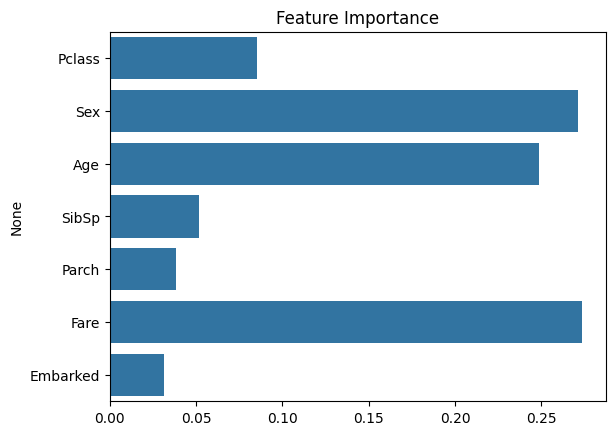

In [10]:
importances = model.feature_importances_
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importance")
plt.show()


In [11]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print("Average accuracy:", scores.mean())


Average accuracy: 0.8137153976523759


In [12]:
from sklearn.model_selection import GridSearchCV
params = {"n_estimators": [100, 200], "max_depth": [4, 6, 8]}
grid = GridSearchCV(RandomForestClassifier(), params, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)


{'max_depth': 8, 'n_estimators': 200}


In [13]:
import joblib
joblib.dump(model, "titanic_model.pkl")


['titanic_model.pkl']

In [15]:
import joblib
joblib.dump(model, "titanic_model.pkl")


['titanic_model.pkl']

In [16]:
# app.py

import streamlit as st
import joblib
import numpy as np

# Load trained model
model = joblib.load("titanic_model.pkl")

# Title
st.title("Titanic Survival Predictor")

# User input
pclass = st.selectbox("Passenger Class", [1, 2, 3])
sex = st.selectbox("Sex", ["Male", "Female"])
age = st.slider("Age", 0, 100, 25)
sibsp = st.number_input("Siblings/Spouses aboard", 0, 10, 0)
parch = st.number_input("Parents/Children aboard", 0, 10, 0)
fare = st.number_input("Fare", 0.0, 600.0, 50.0)
embarked = st.selectbox("Port of Embarkation", ["S", "C", "Q"])

# Encoding categorical variables
sex = 1 if sex == "Male" else 0
embarked = {"S": 2, "C": 0, "Q": 1}[embarked]

# Predict
if st.button("Predict"):
    features = np.array([[pclass, sex, age, sibsp, parch, fare, embarked]])
    prediction = model.predict(features)[0]
    result = "Survived 🟢" if prediction == 1 else "Did Not Survive 🔴"
    st.subheader(result)


2025-06-17 16:07:37.442 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 16:07:37.894 
  command:

    streamlit run C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-17 16:07:37.895 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 16:07:37.896 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 16:07:37.898 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 16:07:37.899 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 16:07:37.902 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 16:07:37.904 Sessi